<a href="https://colab.research.google.com/github/joaopcastro710/Proj_AI/blob/main/Project%202/Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2, Artificial Intelligence at FEUP

In [2]:
#print("hello")
#print("bye")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#TPU google collab

df = pd.read_csv("https://raw.githubusercontent.com/joaopcastro710/Proj_AI/refs/heads/main/Project%202/merged_dataset.csv")

#treino: Dataset2.csv
#treino: merged_dataset.csv
#teste: Dataset1.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction.Date    300000 non-null  object 
 1   Transaction.Amount  300000 non-null  float64
 2   Customer.Age        300000 non-null  int64  
 3   Is.Fraudulent       300000 non-null  int64  
 4   Account.Age.Days    300000 non-null  int64  
 5   Transaction.Hour    300000 non-null  int64  
 6   source              300000 non-null  object 
 7   browser             300000 non-null  object 
 8   sex                 300000 non-null  object 
 9   Payment.Method      300000 non-null  object 
 10  Product.Category    300000 non-null  object 
 11  Quantity            300000 non-null  int64  
 12  Device.Used         300000 non-null  object 
 13  Address.Match       300000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 32.0+ MB
None
       Transaction.Am

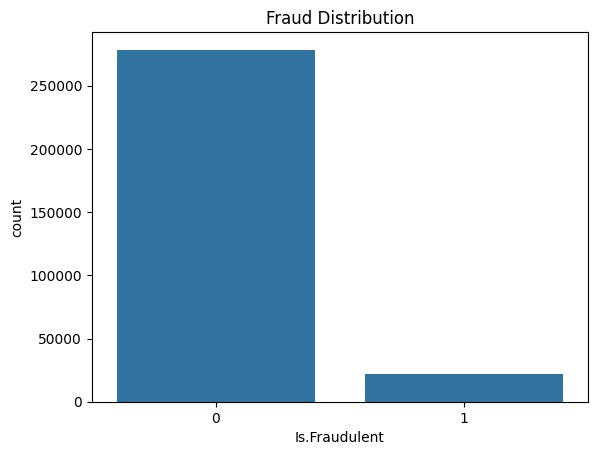

Null values:
Transaction.Date      0
Transaction.Amount    0
Customer.Age          0
Is.Fraudulent         0
Account.Age.Days      0
Transaction.Hour      0
source                0
browser               0
sex                   0
Payment.Method        0
Product.Category      0
Quantity              0
Device.Used           0
Address.Match         0
dtype: int64


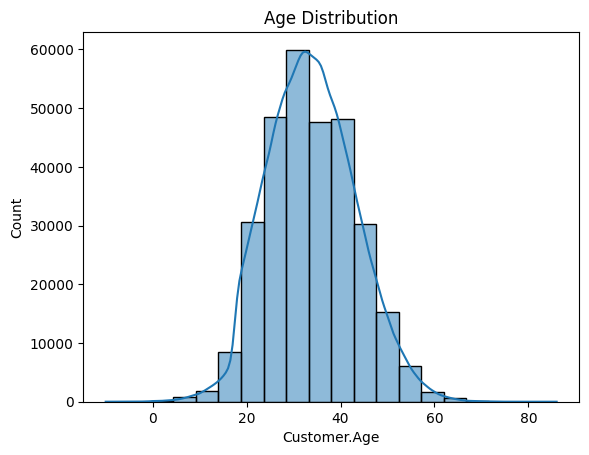

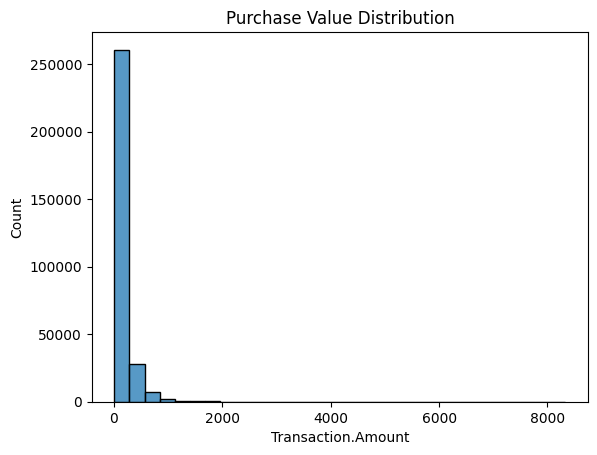

In [4]:
# Preview data - Exploratory analysis
#print(df.head())
print(df.info())
print(df.describe())

sns.countplot(data=df, x='Is.Fraudulent')
plt.title('Fraud Distribution')
plt.show()

print("Null values:")
print(df.isnull().sum())

sns.histplot(df['Customer.Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Transaction.Amount'], bins=30)
plt.title('Purchase Value Distribution')
plt.show()

In [ ]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

#feature engineering - new feature (time it took the purchase in seconds)
df['time_to_purchase'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

df.drop(['signup_time', 'purchase_time', 'user_id', 'device_id', 'ip_address'], axis=1, inplace=True)
df.describe()

,purchase_value,age,class,time_to_purchase
count,151112.000000,151112.000000,151112.000000,1.511120e+05
mean,36.935372,33.140704,0.093646,4.932029e+06
std,18.322762,8.617733,0.291336,3.126263e+06
min,9.000000,18.000000,0.000000,1.000000e+00
25%,22.000000,27.000000,0.000000,2.186754e+06
50%,35.000000,33.000000,0.000000,4.926346e+06
75%,49.000000,39.000000,0.000000,7.644524e+06
max,154.000000,76.000000,1.000000,1.036797e+07


In [ ]:
#data preprocessing
df = pd.get_dummies(df, columns=['source', 'browser', 'sex'], drop_first=True)

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[[ 0.11180358 -0.13446873  1.32278057 ... -0.15691393 -0.44139199
   0.84470251]
 [-0.32481041  0.44573464 -1.09570152 ... -0.15691393  2.26555992
   0.84470251]
 [-1.47092213  1.25801935  0.38008233 ... -0.15691393 -0.44139199
  -1.18384874]
 ...
 [ 0.11180358 -1.64299747  0.98607226 ... -0.15691393 -0.44139199
   0.84470251]
 [ 0.65757106 -0.01842805 -0.03429414 ... -0.15691393 -0.44139199
   0.84470251]
 [-1.47092213 -0.59863142 -0.73775813 ... -0.15691393 -0.44139199
   0.84470251]] [[ 0.43926407 -0.01842805 -0.48251741 ... -0.15691393 -0.44139199
  -1.18384874]
 [ 0.93045481  0.32969397 -1.55640641 ... -0.15691393 -0.44139199
   0.84470251]
 [ 1.36706879 -1.64299747  1.13175879 ... -0.15691393 -0.44139199
  -1.18384874]
 ...
 [-1.52549888 -0.83071276  0.66434464 ... -0.15691393 -0.44139199
   0.84470251]
 [-0.6522709   0.90989733  0.83466356 ... -0.15691393 -0.44139199
   0.84470251]
 [ 0.60299431  0.32969397 -1.26669109 ... -0.15691393 -0.44139199
  -1.18384874]]



training Decision Tree...
time in training: 1.23 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     27373
           1       0.50      0.56      0.53      2850

    accuracy                           0.91     30223
   macro avg       0.73      0.75      0.74     30223
weighted avg       0.91      0.91      0.91     30223



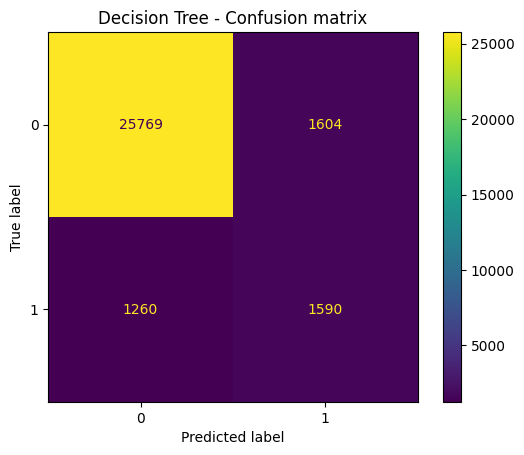


training k-Nearest Neighbors...
time in training: 7.42 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27373
           1       0.82      0.54      0.65      2850

    accuracy                           0.95     30223
   macro avg       0.89      0.76      0.81     30223
weighted avg       0.94      0.95      0.94     30223



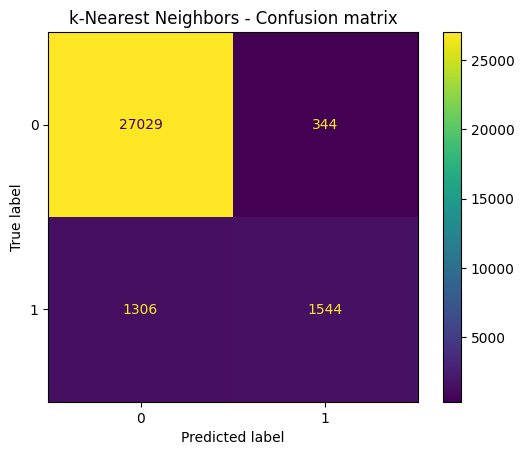


training Support Vector Machine...
time in training: 267.81 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27373
           1       0.89      0.01      0.02      2850

    accuracy                           0.91     30223
   macro avg       0.90      0.51      0.49     30223
weighted avg       0.91      0.91      0.86     30223



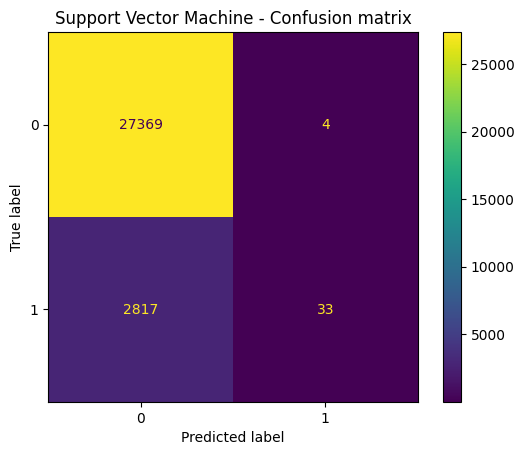

In [ ]:
def train_and_evaluate(model, name):
    print(f"\ntraining {name}...")
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()

    print(f"time in training: {end_time - start_time:.2f} seconds")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} - Confusion matrix")
    plt.show()

train_and_evaluate(DecisionTreeClassifier(random_state=42), "Decision Tree")

train_and_evaluate(KNeighborsClassifier(n_neighbors=5), "k-Nearest Neighbors")

train_and_evaluate(SVC(kernel='rbf', random_state=42), "Support Vector Machine")